# Detectron2

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">


# Install detectron2

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 274 kB 8.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=21c715e13c7bcaa0af8822e91c763e67e150e1dfd38b55cbbe07dad9f945112a
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.9.0+cu111 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!nvidia-smi

Tue Nov  2 15:43:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.9")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 5.5 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 145 kB 57.3 MB/s 
     |████████████████████████████████| 130 kB 65.4 MB/s 
     |████████████████████████████████| 748 kB 70.7 MB/s 
     |████████████████████████████████| 743 kB 37.1 MB/s 
     |████████████████████████████████| 112 kB 69.5 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=bfd0f3783a696a3a0846897ee115d0fa32d0721dfc046b0122695ff88f356945
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=dbce47e08d6ffc3b458903a74ab0ad830fcb2afcf6dd663ea49ea0b54efba4

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

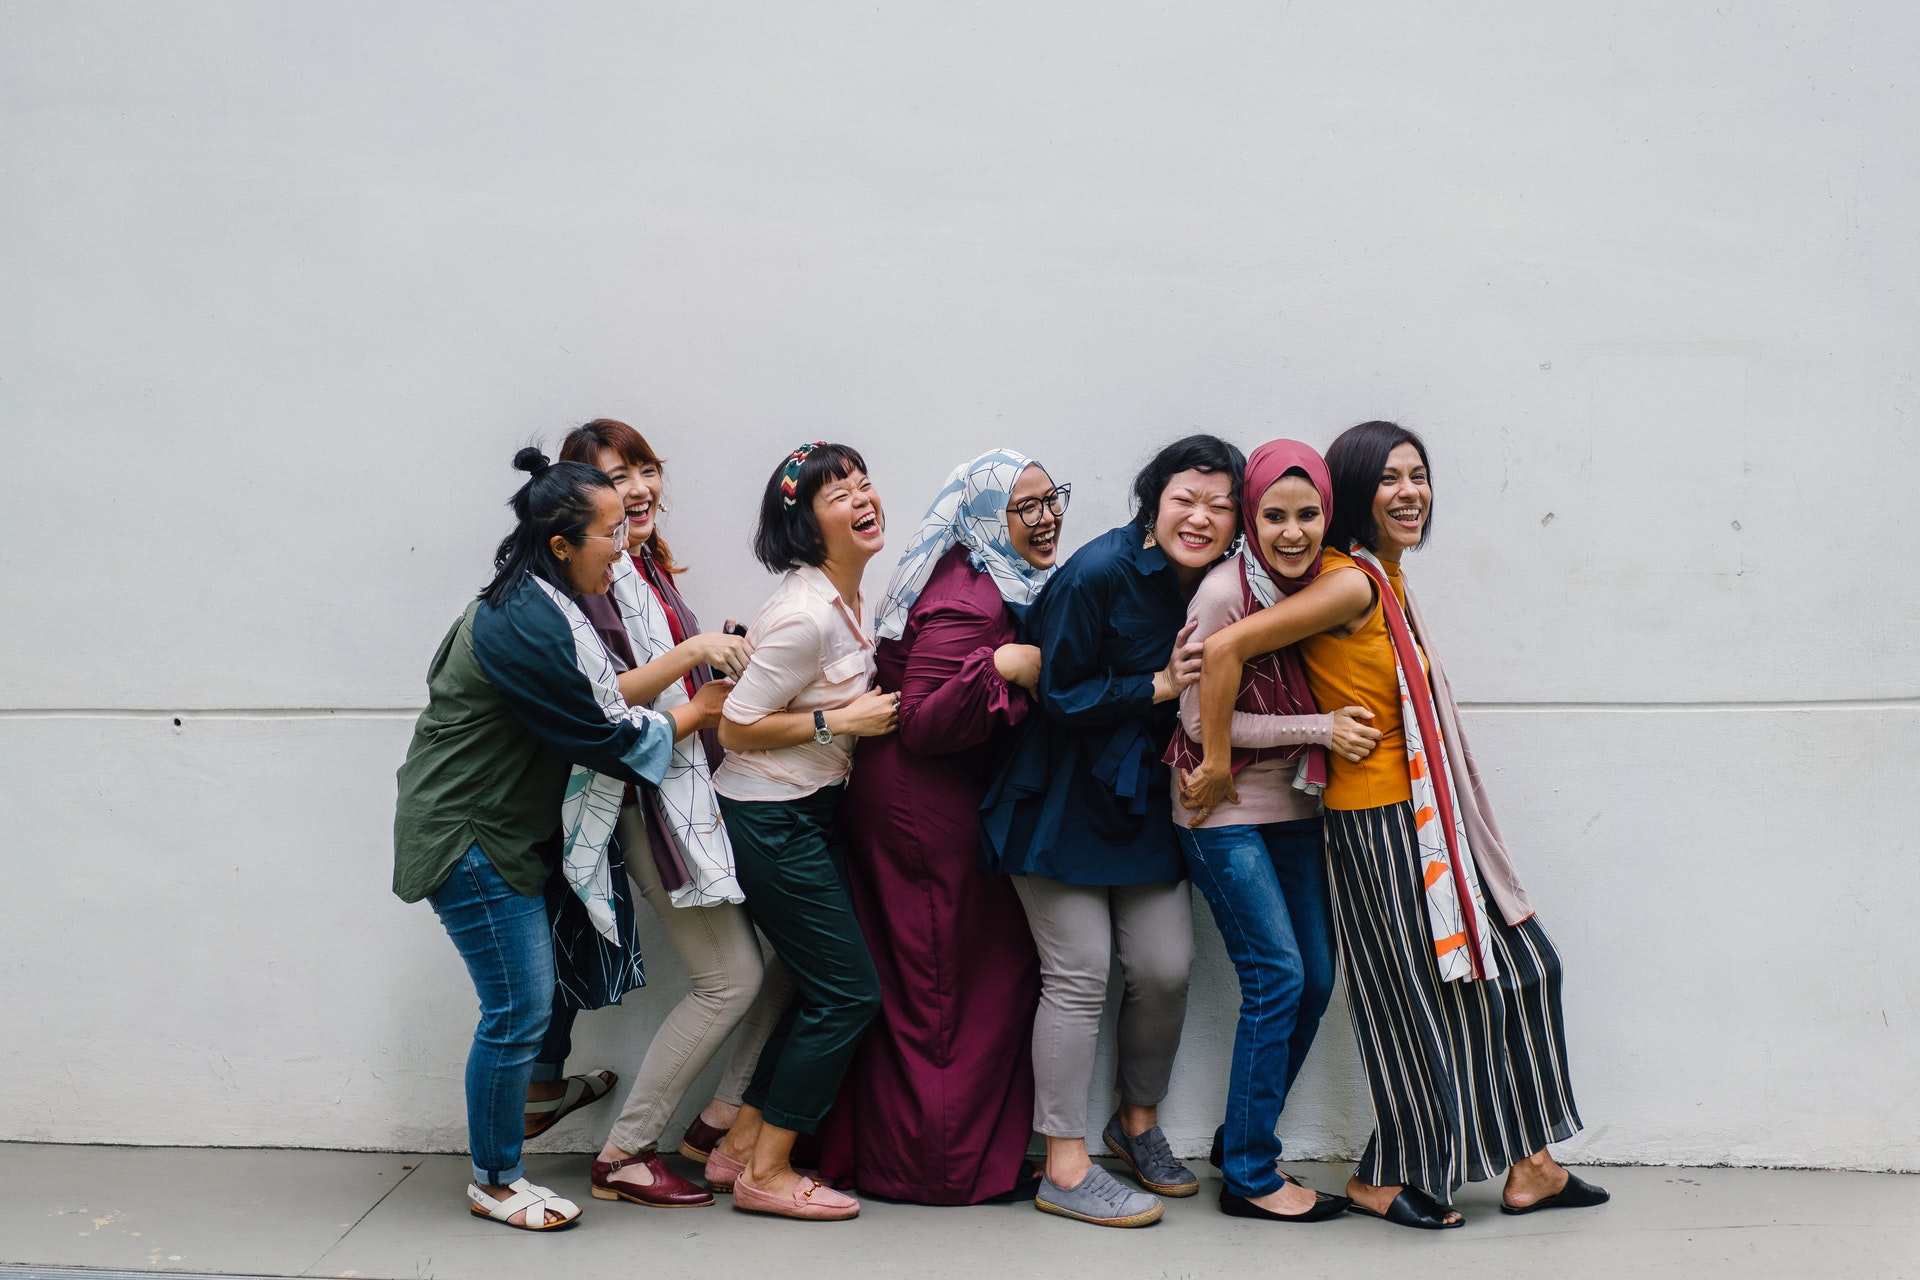

In [ ]:
im = cv2.imread("/content/pexels-mentatdgt-1206059.jpg")
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [ ]:
outputs

{'instances': Instances(num_instances=8, image_height=1280, image_width=1920, fields=[pred_boxes: Boxes(tensor([[1162.8524,  439.8416, 1407.0293, 1237.7408],
         [ 389.3793,  452.7393,  735.2667, 1237.4556],
         [ 984.2073,  421.3230, 1241.4210, 1219.6268],
         [1315.4784,  434.8184, 1586.7689, 1217.3990],
         [ 699.7804,  450.9939,  898.7025, 1229.1921],
         [ 550.2794,  426.3097,  774.2236, 1222.6571],
         [ 833.6271,  435.8037, 1067.6840, 1214.0227],
         [1360.8835,  549.4218, 1486.1864,  980.7454]], device='cuda:0')), scores: tensor([0.9993, 0.9980, 0.9980, 0.9970, 0.9967, 0.9960, 0.9936, 0.8542],
        device='cuda:0'), pred_classes: tensor([ 0,  0,  0,  0,  0,  0,  0, 27], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False,

In [ ]:
# look at the outputs. 
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  0,  0,  0, 27], device='cuda:0')
Boxes(tensor([[1162.8524,  439.8416, 1407.0293, 1237.7408],
        [ 389.3793,  452.7393,  735.2667, 1237.4556],
        [ 984.2073,  421.3230, 1241.4210, 1219.6268],
        [1315.4784,  434.8184, 1586.7689, 1217.3990],
        [ 699.7804,  450.9939,  898.7025, 1229.1921],
        [ 550.2794,  426.3097,  774.2236, 1222.6571],
        [ 833.6271,  435.8037, 1067.6840, 1214.0227],
        [1360.8835,  549.4218, 1486.1864,  980.7454]], device='cuda:0'))


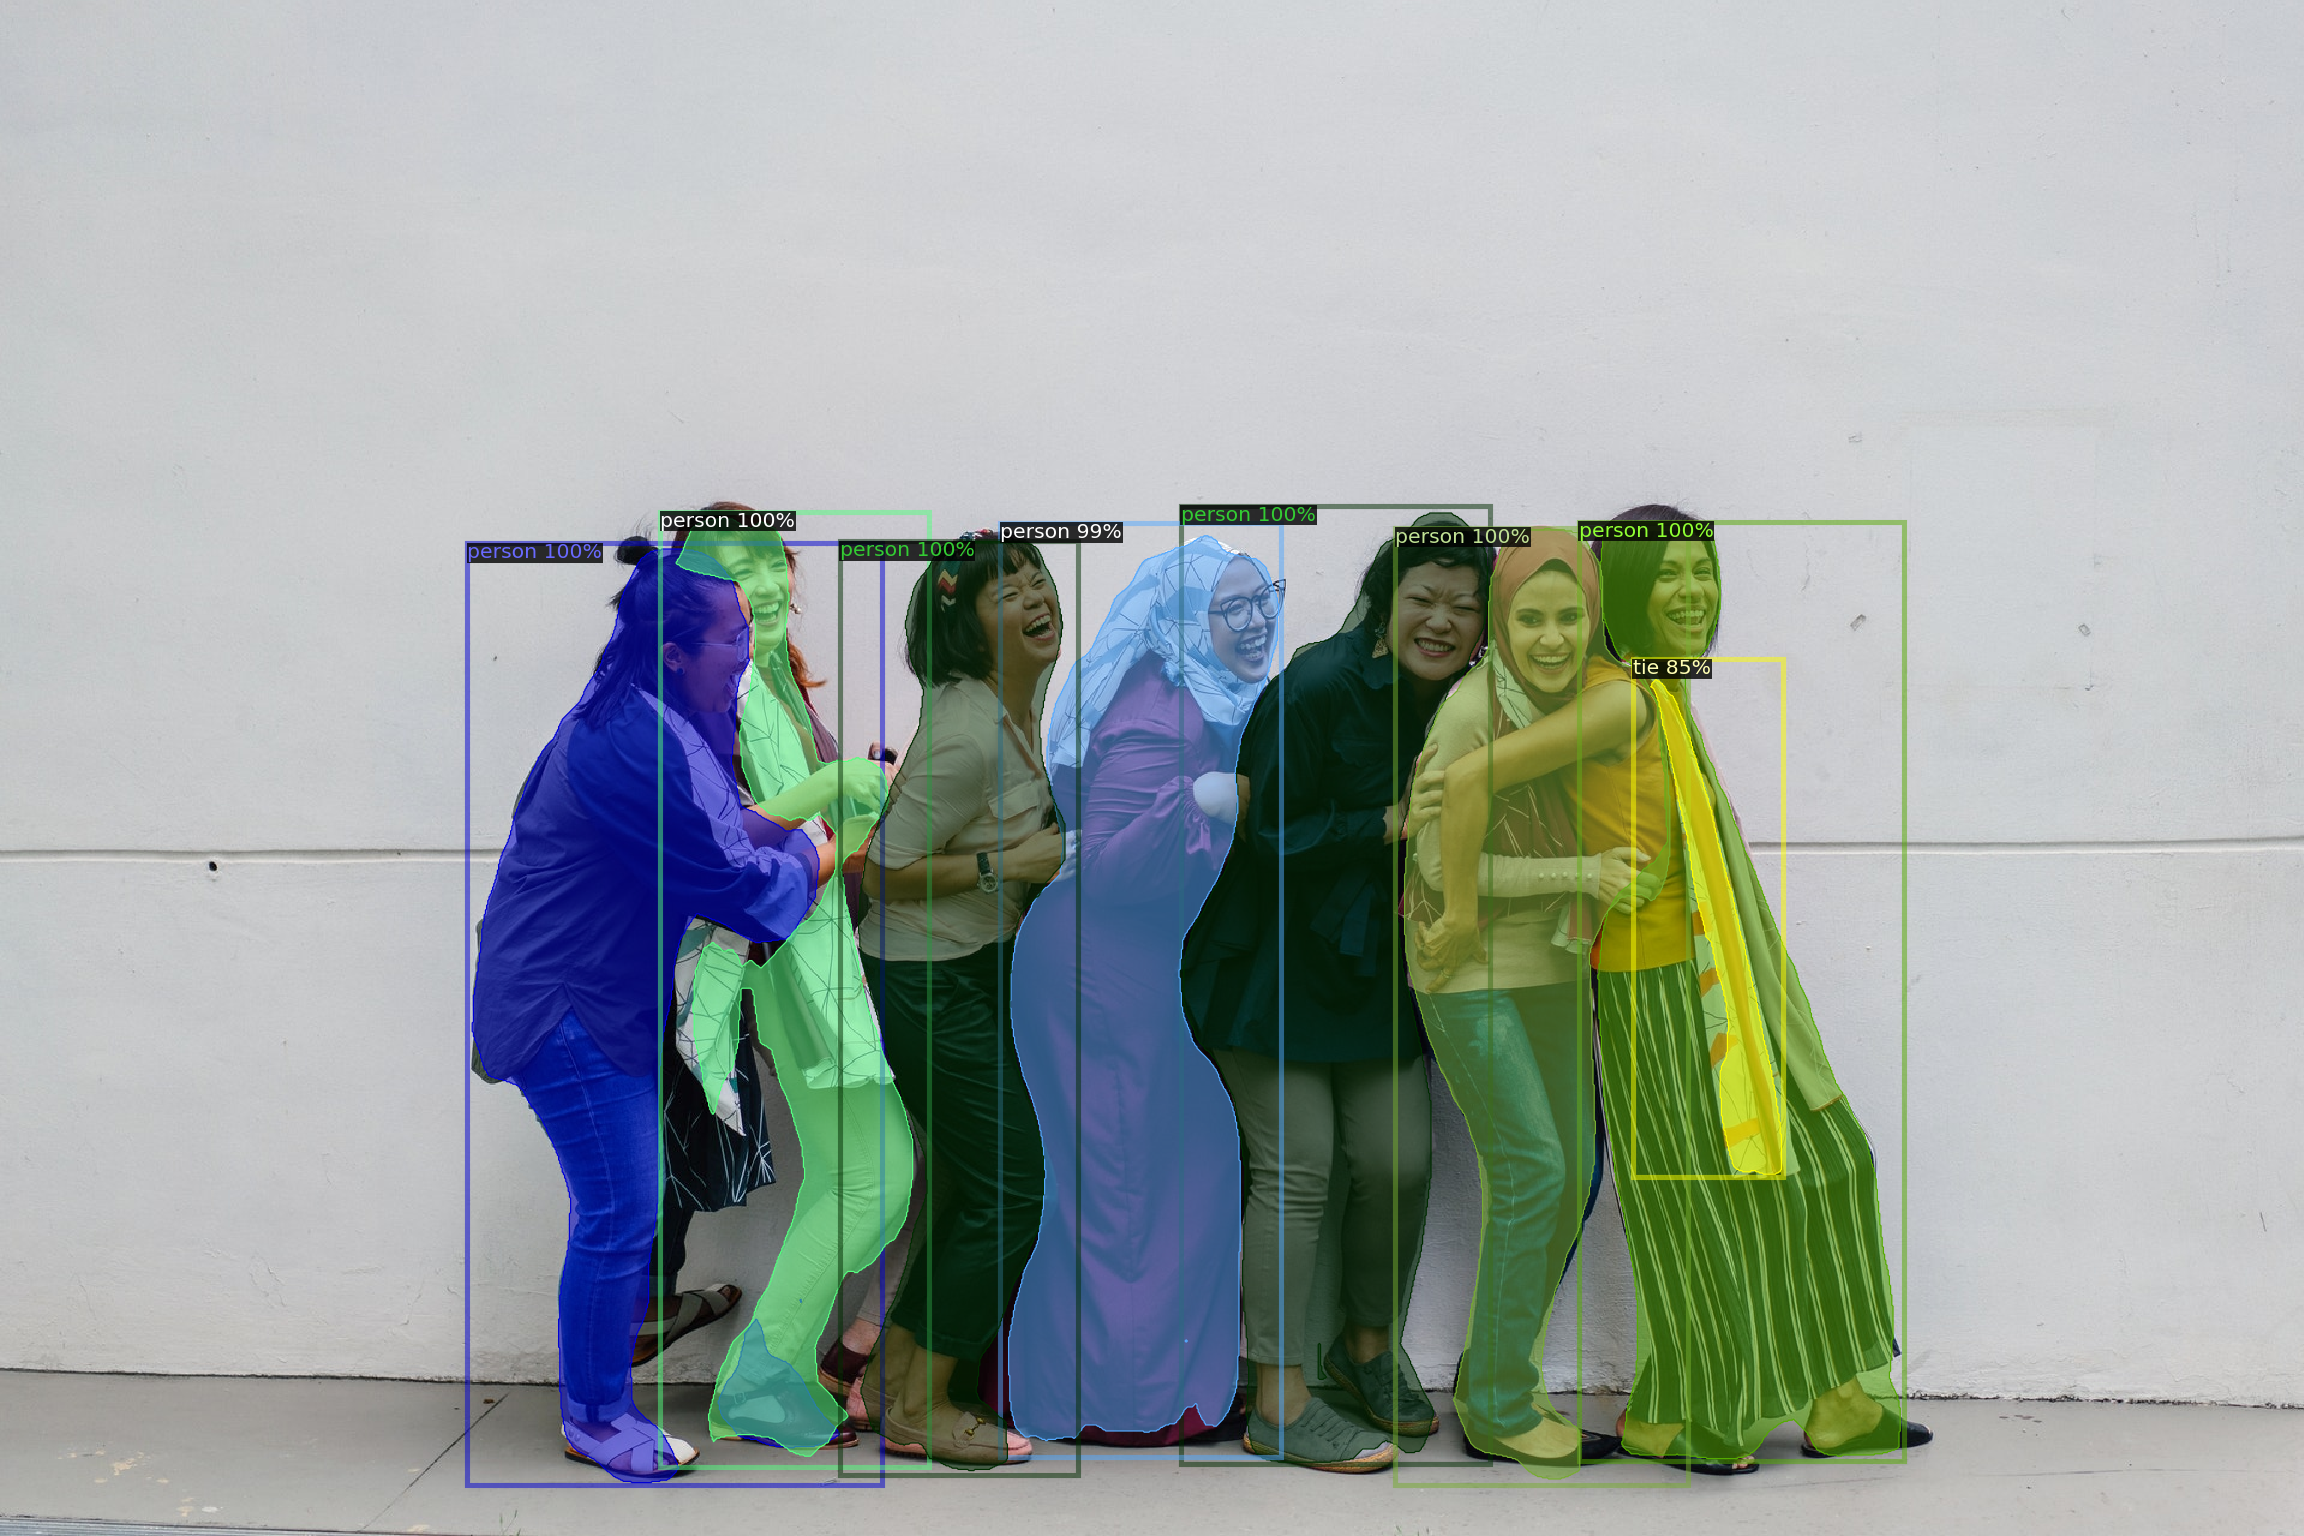

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])